## Import cuxfilter

In [ ]:
import cuxfilter
from bokeh import palettes
from cuxfilter.layouts import *

from bokeh.tile_providers import get_provider as gp
tile_provider = gp('STAMEN_TONER')

In [ ]:
#update data_dir if you have downloaded datasets elsewhere
DATA_DIR = './data'

## Download required datasets

In [ ]:
! curl https://s3.us-east-2.amazonaws.com/rapidsai-data/viz-data/146M_predictions_v2.arrow.gz --create-dirs -o $DATA_DIR/146M_predictions_v2.arrow.gz

In [ ]:
from cuxfilter.sampledata import datasets_check
datasets_check('mortgage', base_dir=DATA_DIR)

## Define charts

In [ ]:
cux_df = cuxfilter.DataFrame.from_arrow(DATA_DIR + '/146M_predictions_v2.arrow')

In [ ]:
cux_df.data.head()

In [ ]:
MAPBOX_API_KEY= "<mapbox-api-key>"
geoJSONSource='https://raw.githubusercontent.com/rapidsai/cuxfilter/GTC-2018-mortgage-visualization/javascript/demos/GTC%20demo/src/data/zip3-ms-rhs-lessprops.json'

In [ ]:
chart0 = cuxfilter.charts.choropleth(
    x='zip',
    
    color_column='delinquency_12_prediction', color_aggregate_fn='mean',
    
    elevation_column='current_actual_upb', elevation_factor=0.00001, elevation_aggregate_fn='sum', 
    
    geoJSONSource=geoJSONSource,
    
    map_style = 'dark', mapbox_api_key=MAPBOX_API_KEY,
   
    data_points=1000, tooltip=True
)

chart2 = cuxfilter.charts.bar('delinquency_12_prediction',data_points=50)
chart3 = cuxfilter.charts.range_slider('borrower_credit_score',data_points=50)


### Add mappings for chart1

In [ ]:
mapper1 = {}

for val in cux_df.data.dti.unique().to_pandas().tolist():
    mapper1[int(val)] = 'l_'+str(val)

chart1 = cuxfilter.charts.panel_widgets.drop_down('dti', label_map=mapper1)
#also available: panel_widgets.multi_select

## Create a dashboard object

In [ ]:
d = cux_df.dashboard([chart0, chart1, chart2, chart3], layout=cuxfilter.layouts.feature_and_base, theme=cuxfilter.themes.dark, title="Mortgage Dashboard")

In [20]:
d

#### cuxfilter DashBoard
    
    [title] (Markdown(str), [])
    [chart1] (Column(height=600, sizing_mode='scale_both', width=1600)
    [0] ParamMethod(method)
    [1] Column(css_classes=['multi-select'])
        [0] Checkbox(name='Multi select')
    [2] DeckGL(Deck, css_classes=['deck-chart'], height=400, sizing_mode='scale_both', width=800), [])
    [chart2] (Column(sizing_mode='scale_both', width=1600)
    [0] Bokeh(Figure)
    [1] RangeSlider(end=0.8056737, sizing_mode='scale_width', start=0.15787923, step=0.012955889701843262, value=(0.15787923, 0.8056737), width=1600), [])
    [widgets] (Column
    [0] Column(css_classes=['non-handle-temp'], sizing_mode='scale_both')
        [0] FloatSlider(bar_color='#8735fb', end=146594623, name='Data Points selected', sizing_mode='scale_both', value=146594623.0, width=280)
    [1] Column(sizing_mode='scale_both', width=400)
        [0] Select(css_classes=['custom-dropdown'], height=50, name='dti', options={'l_1.0': 1, 'l_2.0': 2, ...}, sizing_mode='scale_both', width=280)
    [2] Column(sizing_mode='scale_both', width=400)
        [0] RangeSlider(end=850.0, name='borrower_credit_score', sizing_mode='scale_both', start=330.0, value=(330.0, 850.0), width=280), [])

In [21]:
#View Individual charts - uncomment below line
# chart0.view()

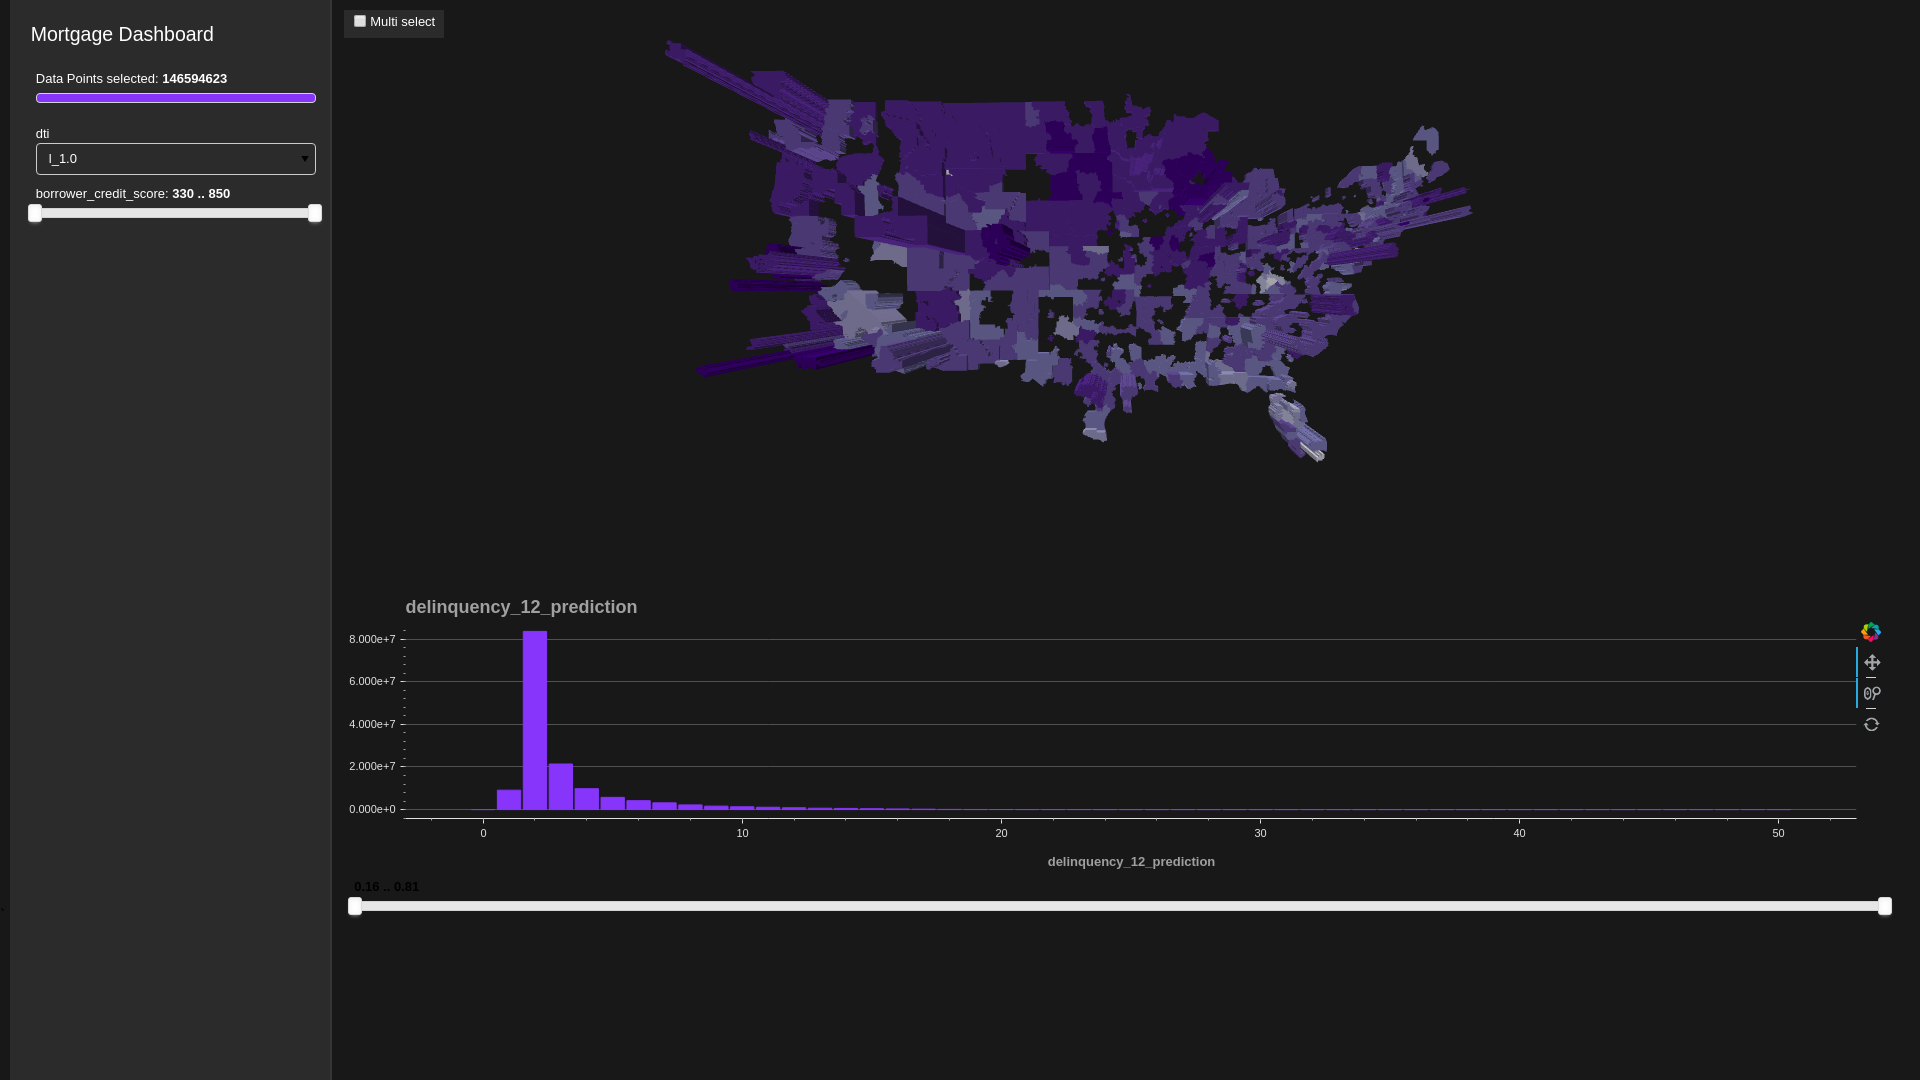

In [22]:
#execute below line for dashboard preview
# await d.preview()

## Starting the dashboard

1. d.show('current_notebook_url:current_notebook_port') remote dashboard

2. d.app('current_notebook_url:current_notebook_port') inline in notebook (layout is ignored, and charts are displayed one below another)

Incase you need to stop the server:

- d.stop()

In [ ]:
# d.show(notebook_url='')

## Export the queried data into a dataframe

In [ ]:
queried_df = d.export()